In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Načítanie dát

In [97]:
X_train = pd.read_csv('clean_data/X_train.csv', on_bad_lines='warn', delimiter=',', usecols=[1, 2, 3, 4, 5])
X_test = pd.read_csv('clean_data/X_test.csv', on_bad_lines='warn', delimiter=',', usecols=[1, 2, 3, 4, 5])
y_train = pd.read_csv('clean_data/y_train.csv', on_bad_lines='warn', delimiter=',', usecols=[1])
y_test = pd.read_csv('clean_data/y_test.csv', on_bad_lines='warn', delimiter=',', usecols=[1])

# Príklad dát

In [98]:
X_test.head()

,c.android.gm,c.android.chrome,p.android.externalstorage,c.dogalize,p.android.packageinstaller
0,0.696702,-0.936878,-0.232747,-0.724483,-1.705570
1,0.923990,-0.362015,0.319878,1.825428,-0.361799
2,0.558392,0.670557,0.795322,-0.023997,0.188033
3,-0.356934,0.636387,0.142010,-0.073549,1.185093
4,-0.710529,-0.582354,-1.034809,0.922548,0.418659


In [99]:
y_test.head()

,mwra
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# Riešenie

## 3.1: Jednoduchý klasifikátor na základe závislosti v dátach

### 3.1 A

Najprv naimplementujeme jednoduchý klasifikátor, na ktorý použijeme DecisionTreeClassifier z knižnice sklearn.tree. Najprv si ale upravíme y množiny.

In [100]:
# Ensure y_train and y_test are in the correct format (e.g., Series)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

print(y_train.shape)
print(y_test.shape)

(27983,)
(9681,)


Následne implementujeme klasifikátor. Priebežným testovaním som zistil, že hĺbka 6 ponúka dosť dobrý pomer ceny a výkonu, tak som klasifikátor implementoval na základe tej hĺbky:

In [101]:
# Implement the ID3 classifier with a minimum depth of 2
id3_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
id3_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

Zobrazíme si tento decision tree v nasledovnom bloku kóde:

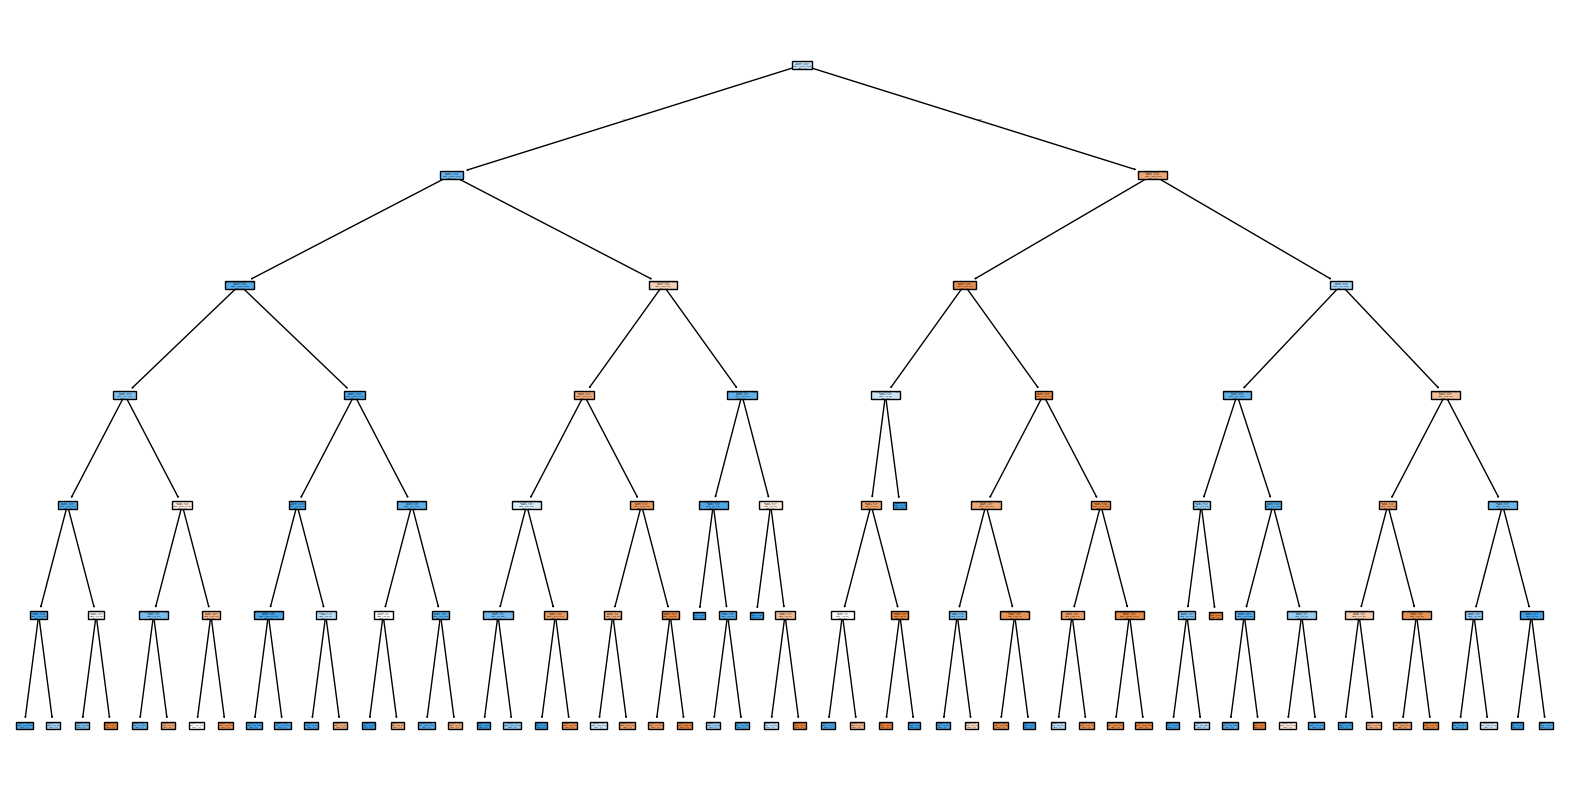

In [102]:
plt.figure(figsize=(20, 10))
plot_tree(id3_classifier, feature_names=X_train.columns, class_names=True, filled=True)
plt.show()

### 3.1 B

Vyhodnotíme tento klasifikátor na základe metrík accuracy, precision a recall. Na to použijeme funkcie z knižnice sklearn.metrics:

In [103]:
# Predict on the training set and the test set
y_train_pred = id3_classifier.predict(X_train)
y_test_pred = id3_classifier.predict(X_test)

In [104]:
# Evaluate the classifier using accuracy, precision, and recall
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')

In [105]:
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

### 3.1 C

Porovnáme hodnoty accuracy, precision a recall medzi trénovacou a testovacou sadou:

In [106]:
# Print the evaluation metrics
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")

Training Accuracy: 0.8944
Training Precision: 0.8943
Training Recall: 0.8944


In [107]:
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")

Test Accuracy: 0.6067
Test Precision: 0.5966
Test Recall: 0.6067


Vidíme, že výkonnosť modelu na trénovacej sade je o dosť lepšia ako na testovacej faze na základe porovnávania všetkých 3 premenných. Môžeme konštatovať, že model jednoznačne overfittuje. 